In [152]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cmath
import os
from google.colab.patches import cv2_imshow
from skimage.color import rgb2gray, gray2rgb

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DISPLAY IMAGE FROM ARRAY 

In [154]:
A = np.arange(0,256,4)
B= np.array([0,0,0,0,0,0,0,0])
C = np.array([0,0,1,1,1,1,0,0])

In [155]:
I1 = np.tile(A,(64,1))
print(I1)

[[  0   4   8 ... 244 248 252]
 [  0   4   8 ... 244 248 252]
 [  0   4   8 ... 244 248 252]
 ...
 [  0   4   8 ... 244 248 252]
 [  0   4   8 ... 244 248 252]
 [  0   4   8 ... 244 248 252]]


In [156]:
I2= np.array([B,B,C,C,C,C,B,B])
print(I2)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [157]:
I33 = np.concatenate((I2,I2), axis = 1)
I3 = np.concatenate((I33,I33), axis = 0)
print(I3)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [158]:
# check the original data type of the matrices 
print("The data type of the matrix I1 before conversion :" ,I1.dtype)
print("The data type of the matrix I2 before conversion :" ,I2.dtype)
print("The data type of the matrix I3 before conversion :" ,I3.dtype)

The data type of the matrix I1 before conversion : int64
The data type of the matrix I2 before conversion : int64
The data type of the matrix I3 before conversion : int64


In [159]:
# convert the matrices to uint8 data type
I1 = np.uint8(I1)
I2 = np.uint8(I2)
I3 = np.uint8(I3)

In [160]:
print("The data type of the matrix I1 after conversion :" ,I1.dtype)
print("The data type of the matrix I2 after conversion :" ,I2.dtype)
print("The data type of the matrix I3 after conversion :" ,I3.dtype)

The data type of the matrix I1 after conversion : uint8
The data type of the matrix I2 after conversion : uint8
The data type of the matrix I3 after conversion : uint8


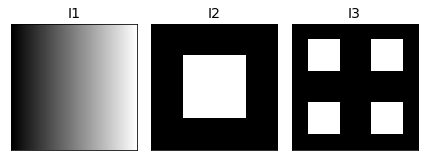

In [161]:
# visualize the arrays I1, I2 and I3

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].set_title("I1", fontsize = 14)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].imshow(I1,cmap='gray')

ax[1].set_title("I2", fontsize = 14)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].imshow(I2,cmap='gray')

ax[2].set_title("I3", fontsize = 14)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].imshow(I3,cmap='gray')

plt.tight_layout()

**Notes**

*   The image L1 is degraded from white to black, we could have known this well before the visualization because the vector A goes from the value 0 to 64 with a step of 4.

*   The image L2 which is a 0 matrix centered  by a square of ones , which translated to a white square with a black surrounding.

*   The image L3, the same but with 4 squares of 1.







## RGB CHANNEL MANIPULATION

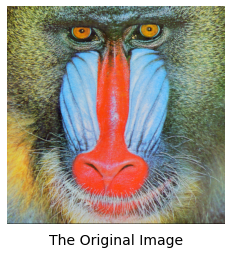

In [162]:
# load and display the original image
path = '/content/drive/MyDrive/images/mandrill.png'
image = cv.imread(path)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.axis('off')
plt.title('The Original Image', fontsize= 14, y=-0.12)
plt.imshow(image)

In [163]:
# shape and data type of the image
print("Image shape:", '\033[92m', image.shape)
print('\033[30m',"Image data type:",'\033[91m',image.dtype)

Image shape:  (512, 512, 3)
 Image data type:  uint8


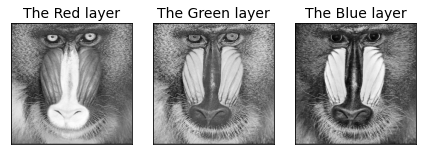

In [164]:
# display the channels of the image
r,g,b  = cv.split(image)

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].set_title("The Red layer", fontsize = 14)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].imshow(r,cmap='gray')

ax[1].set_title("The Green layer", fontsize = 14)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].imshow(g,cmap='gray')

ax[2].set_title("The Blue layer", fontsize = 14)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].imshow(b,cmap='gray')

plt.tight_layout()

**Notes**

We have in the original image the eyes which are orange (a
secondary color composed of red and green) :
- In the image of the green channel the eyes are a little white because the orange is a composition of the green but not as much as the red.
- In the image of the red channel the eyes are white which explains the presence of red much more.
- In the image of the blue channel the eyes are black which explains the absence of blue (orange is not a composition of blue)

*PS: We notice that white represent the presence of a color,  and the black its absence.*

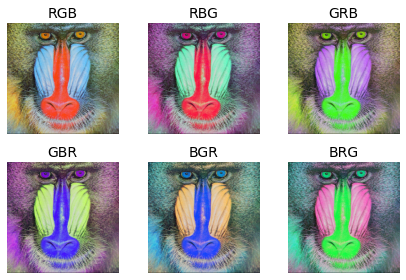

In [165]:
# change the order of the channels RGB

fig,ax = plt.subplots(nrows = 2, ncols=3)
for k in range(2):
  for j in range(3):
    ax[k,j].axis('off')

ax[0,0].imshow(cv.merge([r,g,b]))
ax[0,0].set_title('RGB', fontsize= 14)

ax[0,1].imshow(cv.merge([r,b,g]))
ax[0,1].set_title('RBG', fontsize= 14)

ax[0,2].imshow(cv.merge([g,r,b]))
ax[0,2].set_title('GRB', fontsize= 14)

ax[1,0].imshow(cv.merge([g,b,r]))
ax[1,0].set_title('GBR', fontsize= 14)

ax[1,1].imshow(cv.merge([b,g,r]))
ax[1,1].set_title('BGR', fontsize= 14)

ax[1,2].imshow(cv.merge([b,r,g]))
ax[1,2].set_title('BRG', fontsize= 14)

plt.tight_layout()

**Note**

When we change the order of the RGB channels, the colors of the image change!

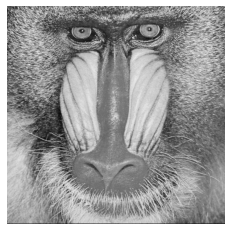

In [166]:
# display the Luminance channel of the image using two different methods
luminance = 0.2126*r+0.7152*g+0.0722*b
plt.axis('off')
plt.imshow(luminance, cmap = 'gray')

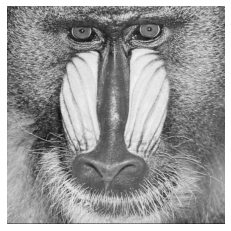

In [167]:
im9 =cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(im9, cmap = 'gray')

We didn't get the same image of the Luminance channel using two different methods, there is a small difference that can be justified by the slight inaccuracy and uncertainty of the Luminance formula.

## IMAGE SUBSAMPLING 

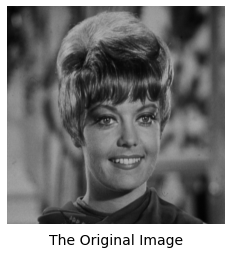

In [168]:
path = '/content/drive/MyDrive/images/zelda.png'
zelda = cv.imread(path)
plt.axis('off')
plt.title('The Original Image', fontsize= 14, y=-0.12)
plt.imshow(zelda)

In [169]:
# shape and data type of the original zelda image
print(zelda.dtype)
print(zelda.shape)

uint8
(512, 512, 3)


In [170]:
# sub-sampling the image
zelda_128 = zelda_gray*128
for i in range(0,512):
  for j in range (0,512):
    zelda_128[i,j] = round(zelda_128[i,j])
  
zelda_64 = zelda_gray*64
for i in range(0,512):
  for j in range (0,512):
    zelda_64[i,j] = round(zelda_64[i,j])

zelda_32 = zelda_gray*32
for i in range(0,512):
  for j in range (0,512):
    zelda_32[i,j] = round(zelda_32[i,j])

zelda_16 = zelda_gray*16
for i in range(0,512):
  for j in range (0,512):
    zelda_16[i,j] = round(zelda_16[i,j])

zelda_8 = zelda_gray*8
for i in range(0,512):
  for j in range (0,512):
    zelda_8[i,j] = round(zelda_8[i,j])

zelda_4 = zelda_gray*4
for i in range(0,512):
  for j in range (0,512):
    zelda_4[i,j] = round(zelda_4[i,j])

zelda_2 = zelda_gray*2
for i in range(0,512):
  for j in range (0,512):
    zelda_2[i,j] = round(zelda_2[i,j])

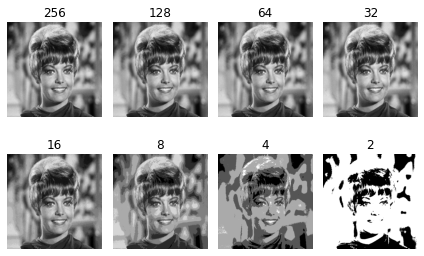

In [171]:
# display the sub-sampled figures
fig, ax = plt.subplots(2,4)
ax[0,0].imshow(zelda_gray, cmap = 'gray')
ax[0,1].imshow(zelda_128, cmap = 'gray')
ax[0,2].imshow(zelda_64, cmap = 'gray')
ax[0,3].imshow(zelda_32, cmap = 'gray')
ax[1,0].imshow(zelda_16, cmap = 'gray')
ax[1,1].imshow(zelda_8, cmap = 'gray')
ax[1,2].imshow(zelda_4, cmap = 'gray')
ax[1,3].imshow(zelda_2, cmap = 'gray')

for k in range(2):
  for j in range(4):
    ax[k,j].axis('off')

ax[0,0].set_title("256")
ax[0,1].set_title("128")
ax[0,2].set_title("64")
ax[0,3].set_title("32")
ax[1,0].set_title("16")
ax[1,1].set_title("8")
ax[1,2].set_title("4")
ax[1,3].set_title("2")

plt.tight_layout()

the minimum quantification threshold is **16**

## HISTOGRAM EQUALIZATION

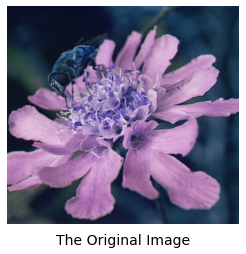

In [172]:
# display the original image
path = '/content/drive/MyDrive/images/flower.bmp'
flower = cv.imread(path)
plt.axis('off')
plt.title('The Original Image', fontsize= 14, y=-0.12)
plt.imshow(flower)

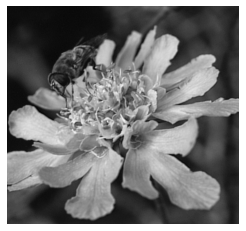

In [173]:
# display the image in grayscale
flower_gray = cv.cvtColor(flower  , cv.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(flower_gray, cmap='gray')

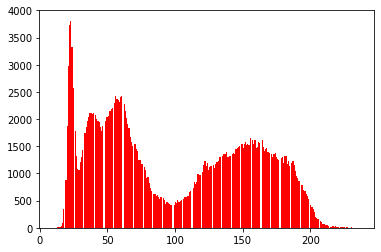

In [174]:
# the histogram of the image
flower_hist = flower_gray.ravel()
array = plt.hist(flower_hist, bins = 256, color = 'red')

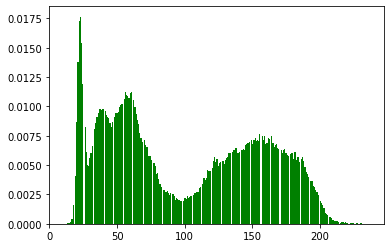

In [175]:
# the normalized histogram of the image
array = plt.hist(flower_gray.ravel(), bins = 256, density = True, color = 'green')

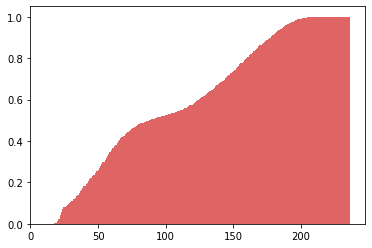

In [176]:
# the cumulative histogram of the image
array = plt.hist(flower_gray.ravel(), bins = 256, density = True,cumulative=True, color = '#DE6564')

In [177]:
"""creating a function that equalize the image""" 
def image_egalisation(image):
  img = np.asarray(image)
  flat = img.ravel()
  histogram = np.zeros(256)
  for pixel in flat:
    histogram[pixel] += 1
  histogram = iter(histogram)
  b = [next(histogram)]
  for i in histogram:
    b.append(b[-1] + i)
  cs = np.array(b)
  nj = (cs - cs.min()) * 255
  N = cs.max() - cs.min()
  cs = cs.astype('uint8')
  cs = nj / N
  img_new = cs[flat]
  img_new = np.reshape(img_new, image.shape)
  return img_new
  

In [178]:
leg_im = image_egalisation(flower_gray)

In [179]:
from skimage import exposure
equalized_image = exposure.equalize_hist(flower_gray)

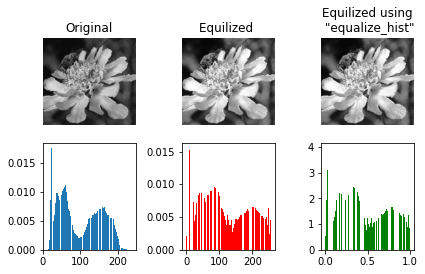

In [180]:
""" compare between the original image and the equalized images using two different methods"""
# first method ----> creating a function that equalize the histogram
# second method ----> using a built_in function to equalize the histogram

fig, axis = plt.subplots(nrows = 2, ncols = 3)
axis[0,0].imshow(flower_gray, cmap = 'gray')
axis[0,1].imshow(leg_im, cmap = 'gray')
axis[0,2].imshow(equalized_image, cmap = 'gray')

axis[0,0].set_title('Original')
axis[0,1].set_title('Equilized ')
axis[0,2].set_title('Equilized using\n "equalize_hist"')

axis[1,0].hist(flower_gray.ravel(), bins = 256, density = True)
axis[1,1].hist(leg_im.ravel(), bins = 256, density = True, color = 'red') 
axis[1,2].hist(equalized_image.ravel(), bins = 256, density = True, color = 'green') 

for j in range(3):
  axis[0,j].axis('off')

plt.tight_layout()

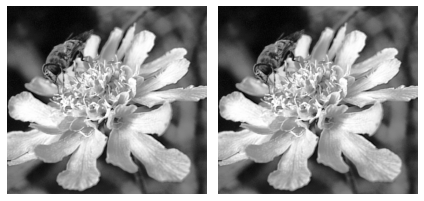

In [181]:
fig, ax = plt.subplots(nrows = 1, ncols= 2)

ax[0].imshow(leg_im, cmap = 'gray')
ax[0].axis('off')

ax[1].imshow(equalized_image, cmap = 'gray')
ax[1].axis('off')

plt.tight_layout()

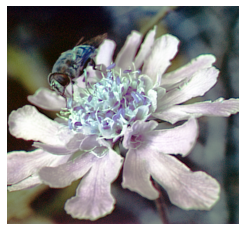

In [182]:
from skimage.color import rgb2gray
r_fl,g_fl,b_fl  = cv.split(flower)
r_eg_fl = exposure.equalize_hist(r_fl)
g_eg_fl = exposure.equalize_hist(g_fl)
b_eg_fl = exposure.equalize_hist(b_fl)
image = cv.merge([r_eg_fl, g_eg_fl, b_eg_fl])
plt.axis('off')
plt.imshow(image)

In [183]:
# estimating the entropy of the image
import skimage.measure as skm    
entropy = skm.shannon_entropy(image)
print(' The entropy of the image: ', entropy)

 The entropy of the image:  8.980169359979929


## CONTRAST ENHANCEMENT USING HISTOGRAM EQUALISATION

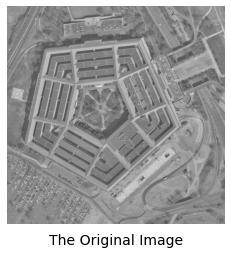

In [184]:
path = '/content/drive/MyDrive/images/pentagon.tif'
pentagon = cv.imread(path)
plt.title('The Original Image', fontsize= 14, y=-0.12)
plt.axis('off')
plt.imshow(pentagon)

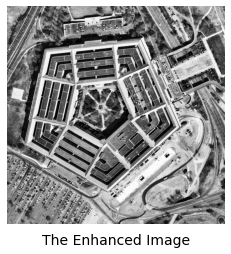

In [185]:
pentagon_eg = exposure.equalize_hist(pentagon)
plt.title('The Enhanced Image', fontsize= 14, y=-0.12)
plt.axis('off')
plt.imshow(pentagon_eg)

## HISTOGRAM MATCHING

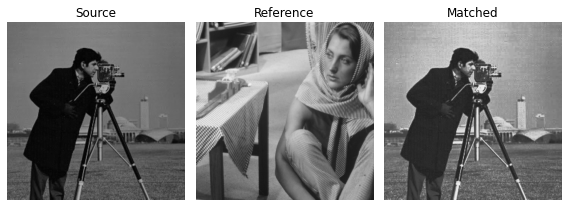

In [186]:
from skimage.exposure import match_histograms
image = cv.imread('/content/drive/MyDrive/images/cameraman.jpg')
reference = cv.imread('/content/drive/MyDrive/images/barbara.png')
matched = match_histograms(image, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()